## Estíbaliz Martínez Cano

### Used libraries
- `pandas` for table operations + io
- `math`for computations or mathematical checkings
- Various `os` imports for filesystem operations
- `plotly.express` for generating charts

In [1]:
import pandas as pd
import math
import numpy as np
from os import listdir
from os.path import isfile, join
import plotly.express as px

### Reading the csv files

In [2]:
path = "data"
onlyfiles = [join(path, f) for f in listdir(path) if isfile(join(path, f)) and f.endswith(".csv") ]

df_demographic, df_talent = pd.DataFrame(), pd.DataFrame()

for file in onlyfiles:
    # To avoid excel recovery files (the ones that start with ~)
    filename = file.split('\\')[-1:][0]
    if filename[0] != "~":
        df = pd.read_csv(file, encoding='utf8', sep=';', decimal=',')
        
        if filename == "Demographics.csv":
            df_demographic = df
            df_demographic.dropna(how='all', inplace=True)
        else:
            df_talent = df
            df_talent.dropna(how='all', inplace=True)

In [3]:
df_demographic.head()

,Employee Number,Name,Last Name,Gender,Age,Country of Work,Level 2022
0,A0001,Jessica,Abraham,Female,33.2,United States,8.0
1,A0002,Joan,Allan,Female,25.2,Spain,6.0
2,A0003,Joanne,Alsop,Female,42.6,India,6.0
3,A0004,Julia,Anderson,Female,43.5,India,7.0
4,A0005,Karen,Arnold,Female,61.1,India,5.0


In [4]:
df_talent.head()

,Employee Number,Level 2020,Level 2021,Performance 2019,Performance 2020,Performance 2021,Potential 2019,Potential 2020,Potential 2021
0,A0027,3.0,3.0,Performer,NaN,NaN,5.0,4.0,5
1,A0005,4.0,4.0,Competent,High Performer,High Performer,7.0,7.0,4
2,A0067,4.0,4.0,Performer,High Performer,High Performer,6.0,9.0,9
3,A0080,4.0,5.0,Performer,High Performer,High Performer,6.0,9.0,9
4,A0034,4.0,5.0,Performer,Competent,Competent,5.0,6.0,5


### Processing the data 
- `join` function for getting just one df
- Adding _'Name'_ and _'Last Name'_ columns in one column, using `drop` to delete the initial two columns
- Creating a new boolean column based on if the value of the _'Age'_ column is less than 36.0 and use `drop`to delete the _'Age'_ column
- `apply` function to filter the employees that have been promoted based on their level and create a new boolean column
- Changing the performance values by its value scale using `apply` and `isna` functions in order to compute the average of performance with `mean`
- Repeating the previous process to create the _'Potential Average'_ column
- Generating the _'Score'_ column with `sum` function of the _'Performance Average'_ and _'Potential Average'_ columns
- Reordering the columns using `pop` and `insert`
- Rounding all float numbers to 2 decimals with `round`
- `to_excel` function to convert the dataframe to an Excel file

#### Join the dataframes

In [5]:
df_master = df_demographic.join(df_talent.set_index('Employee Number'), on='Employee Number')
df_master.head()

,Employee Number,Name,Last Name,Gender,Age,Country of Work,Level 2022,Level 2020,Level 2021,Performance 2019,Performance 2020,Performance 2021,Potential 2019,Potential 2020,Potential 2021
0,A0001,Jessica,Abraham,Female,33.2,United States,8.0,7.0,7.0,NaN,High Performer,Performer,6.0,6.0,9
1,A0002,Joan,Allan,Female,25.2,Spain,6.0,NaN,5.0,NaN,Performer,NaN,6.0,5.0,4
2,A0003,Joanne,Alsop,Female,42.6,India,6.0,6.0,6.0,Competent,Competent,Under Performer,4.0,4.0,2
3,A0004,Julia,Anderson,Female,43.5,India,7.0,5.0,6.0,Competent,High Performer,Competent,8.0,5.0,5
4,A0005,Karen,Arnold,Female,61.1,India,5.0,4.0,4.0,Competent,High Performer,High Performer,7.0,7.0,4


#### Create Complete Name column

In [6]:
df_master['Complete Name'] = df_master['Name'].fillna('') + ' ' + df_master['Last Name'].fillna('') # replace NAs with blanks
df_master['Complete Name'] = df_master['Complete Name'].str.strip() # remove leading and trailing space that appears when a NA is replaced
df_master.drop(columns=['Name', 'Last Name'], inplace=True)
df_master.head()

,Employee Number,Gender,Age,Country of Work,Level 2022,Level 2020,Level 2021,Performance 2019,Performance 2020,Performance 2021,Potential 2019,Potential 2020,Potential 2021,Complete Name
0,A0001,Female,33.2,United States,8.0,7.0,7.0,NaN,High Performer,Performer,6.0,6.0,9,Jessica Abraham
1,A0002,Female,25.2,Spain,6.0,NaN,5.0,NaN,Performer,NaN,6.0,5.0,4,Joan Allan
2,A0003,Female,42.6,India,6.0,6.0,6.0,Competent,Competent,Under Performer,4.0,4.0,2,Joanne Alsop
3,A0004,Female,43.5,India,7.0,5.0,6.0,Competent,High Performer,Competent,8.0,5.0,5,Julia Anderson
4,A0005,Female,61.1,India,5.0,4.0,4.0,Competent,High Performer,High Performer,7.0,7.0,4,Karen Arnold


#### Determine early career employees and create the corresponding column

In [7]:
df_master['Early Career'] = df_master['Age'] < 36.0
df_master.drop(columns=['Age'], inplace=True)
df_master.head()

,Employee Number,Gender,Country of Work,Level 2022,Level 2020,Level 2021,Performance 2019,Performance 2020,Performance 2021,Potential 2019,Potential 2020,Potential 2021,Complete Name,Early Career
0,A0001,Female,United States,8.0,7.0,7.0,NaN,High Performer,Performer,6.0,6.0,9,Jessica Abraham,True
1,A0002,Female,Spain,6.0,NaN,5.0,NaN,Performer,NaN,6.0,5.0,4,Joan Allan,True
2,A0003,Female,India,6.0,6.0,6.0,Competent,Competent,Under Performer,4.0,4.0,2,Joanne Alsop,False
3,A0004,Female,India,7.0,5.0,6.0,Competent,High Performer,Competent,8.0,5.0,5,Julia Anderson,False
4,A0005,Female,India,5.0,4.0,4.0,Competent,High Performer,High Performer,7.0,7.0,4,Karen Arnold,False


#### Create Promotion column with the information of the last 3 years

In [8]:
def promote(data):
    if  pd.isna(data['Level 2020']): data['Level 2020'] = 0 # replace all NAs by 0
    if  pd.isna(data['Level 2021']): data['Level 2021'] = 0
    if  pd.isna(data['Level 2022']): data['Level 2022'] = 0
    
    return data['Level 2020'] < data['Level 2021'] or data['Level 2021'] < data['Level 2022']
    
    
df_master['Promotion'] = df_master.apply(promote, axis=1)
df_master.drop(columns=['Level 2020', 'Level 2021', 'Level 2022'], inplace=True)
df_master.head()

,Employee Number,Gender,Country of Work,Performance 2019,Performance 2020,Performance 2021,Potential 2019,Potential 2020,Potential 2021,Complete Name,Early Career,Promotion
0,A0001,Female,United States,NaN,High Performer,Performer,6.0,6.0,9,Jessica Abraham,True,True
1,A0002,Female,Spain,NaN,Performer,NaN,6.0,5.0,4,Joan Allan,True,True
2,A0003,Female,India,Competent,Competent,Under Performer,4.0,4.0,2,Joanne Alsop,False,False
3,A0004,Female,India,Competent,High Performer,Competent,8.0,5.0,5,Julia Anderson,False,True
4,A0005,Female,India,Competent,High Performer,High Performer,7.0,7.0,4,Karen Arnold,False,True


#### Create Performance column based on the specified values associated with the performance info

In [9]:
performance_scale = {'Under Performer': 1.0, 'Competent': 2.0, 'Performer': 3.0, 'High Performer': 4.0}

def performance_to_value(performance):
    if pd.isna(performance): return 0 
    return performance_scale[performance]

df_master['Performance 2019'] = df_master['Performance 2019'].apply(performance_to_value)
df_master['Performance 2020'] = df_master['Performance 2020'].apply(performance_to_value)
df_master['Performance 2021'] = df_master['Performance 2021'].apply(performance_to_value)

df_master['Performance Average'] = df_master[['Performance 2019', 'Performance 2020', 'Performance 2021']].mean(axis=1)
df_master.drop(columns=['Performance 2019', 'Performance 2020', 'Performance 2021'], inplace=True)

df_master.head()

,Employee Number,Gender,Country of Work,Potential 2019,Potential 2020,Potential 2021,Complete Name,Early Career,Promotion,Performance Average
0,A0001,Female,United States,6.0,6.0,9,Jessica Abraham,True,True,2.333333
1,A0002,Female,Spain,6.0,5.0,4,Joan Allan,True,True,1.000000
2,A0003,Female,India,4.0,4.0,2,Joanne Alsop,False,False,1.666667
3,A0004,Female,India,8.0,5.0,5,Julia Anderson,False,True,2.666667
4,A0005,Female,India,7.0,7.0,4,Karen Arnold,False,True,3.333333


#### Create Potential column based on the specified values associated with the displayed potentials

In [10]:
potential_scale = {0: 0.0, 1: 1.0, 2: 2.0, 3: 3.0, 4: 1.0, 5: 2.0, 6: 3.0, 7: 1.0, 8: 2.0, 9: 3.0}

def potential_to_value(potential):
    if pd.isna(potential): return 0 # check nan again because Potential 2021 column can have nans as well
    return potential_scale[potential]

df_master['Potential 2019'].fillna(0, inplace=True) # replace nan so it is possible to cast to int
df_master['Potential 2020'].fillna(0, inplace=True)
df_master['Potential 2019'] = df_master['Potential 2019'].astype(int)
df_master['Potential 2020'] = df_master['Potential 2020'].astype(int)

df_master['Potential 2019'] = df_master['Potential 2019'].apply(potential_to_value)
df_master['Potential 2020'] = df_master['Potential 2020'].apply(potential_to_value)
df_master['Potential 2021'] = df_master['Potential 2021'].apply(potential_to_value)

df_master['Potential Average'] = df_master[['Potential 2019', 'Potential 2020', 'Potential 2021']].mean(axis=1)
df_master.drop(columns=['Potential 2019', 'Potential 2020', 'Potential 2021'], inplace=True)

df_master.head()

,Employee Number,Gender,Country of Work,Complete Name,Early Career,Promotion,Performance Average,Potential Average
0,A0001,Female,United States,Jessica Abraham,True,True,2.333333,3.000000
1,A0002,Female,Spain,Joan Allan,True,True,1.000000,2.000000
2,A0003,Female,India,Joanne Alsop,False,False,1.666667,1.333333
3,A0004,Female,India,Julia Anderson,False,True,2.666667,2.000000
4,A0005,Female,India,Karen Arnold,False,True,3.333333,1.000000


#### Create Score column based on Performance and Potential ones

In [11]:
df_master['Score'] = df_master['Performance Average']+df_master['Potential Average']
#df_master['Score'] = df_master[['Performance Average', 'Potential Average']].sum(axis=1)

df_master.head()

,Employee Number,Gender,Country of Work,Complete Name,Early Career,Promotion,Performance Average,Potential Average,Score
0,A0001,Female,United States,Jessica Abraham,True,True,2.333333,3.000000,5.333333
1,A0002,Female,Spain,Joan Allan,True,True,1.000000,2.000000,3.000000
2,A0003,Female,India,Joanne Alsop,False,False,1.666667,1.333333,3.000000
3,A0004,Female,India,Julia Anderson,False,True,2.666667,2.000000,4.666667
4,A0005,Female,India,Karen Arnold,False,True,3.333333,1.000000,4.333333


#### Reorder the columns and round the float numbers

In [12]:
col_name = df_master.pop('Complete Name')
df_master.insert(1, 'Complete Name', col_name)

col_career = df_master.pop('Early Career')
df_master.insert(3, 'Early Career', col_career)

df_master = df_master.round(decimals=2) # round to two decimals all the float numbers

df_master.head()

,Employee Number,Complete Name,Gender,Early Career,Country of Work,Promotion,Performance Average,Potential Average,Score
0,A0001,Jessica Abraham,Female,True,United States,True,2.33,3.00,5.33
1,A0002,Joan Allan,Female,True,Spain,True,1.00,2.00,3.00
2,A0003,Joanne Alsop,Female,False,India,False,1.67,1.33,3.00
3,A0004,Julia Anderson,Female,False,India,True,2.67,2.00,4.67
4,A0005,Karen Arnold,Female,False,India,True,3.33,1.00,4.33


#### Generate the Excel file

In [13]:
df_master.to_excel('.\\data\\Masterfile.xlsx', index=None, encoding='utf-8')

### Analyzing the data

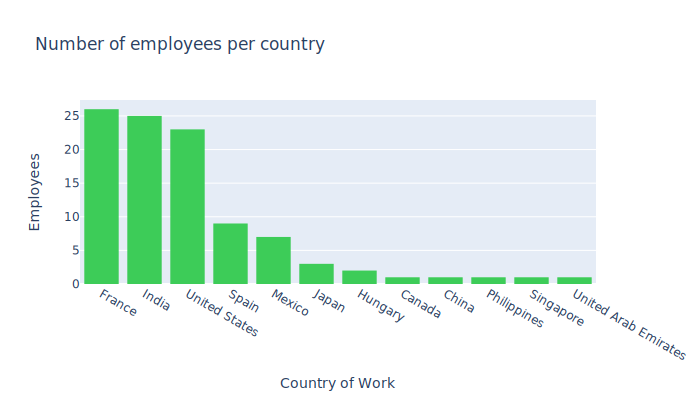

In [14]:
df_employees_per_country = df_master.value_counts(['Country of Work']).reset_index(name='Count')
fig_bar_num_employees = px.histogram(df_employees_per_country, x='Country of Work', y='Count', 
                                     height=400, title='Number of employees per country',
                                    color_discrete_sequence=['#3DCC58'])
fig_bar_num_employees.update_layout(yaxis_title='Employees')
fig_bar_num_employees.show('svg') # not interactive display just to render on Github
# fig_bar_num_employees.show() #interactive display

#### Observations
As we can see the number of employees is not greater than 1 for most of the countries, and not significant either for Hungary and Japan. So, in order to give more reliable insights the countries with not significant amount of data should be ignore since we can not made trustworthy analytics through them. We will focus in study the behaviour of the data of __France__, __India__ and __USA__ since the number of employees is bigger in each of them, as well as similar which made easier to compare different characteristics among them.

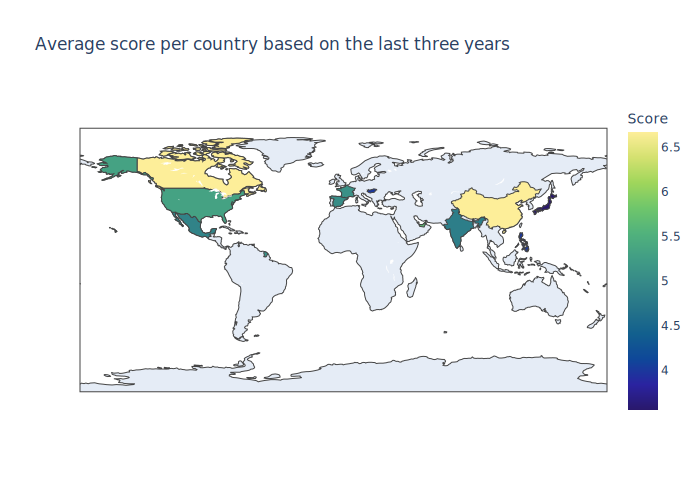

In [15]:
df_score_per_country = df_master.groupby('Country of Work', as_index=False)['Score'].mean()

fig_map = px.choropleth(df_score_per_country, locationmode='country names', locations='Country of Work', 
                     color='Score', color_continuous_scale='haline', hover_name='Country of Work',
                    title='Average score per country based on the last three years')
fig_map.show('svg') # not interactive display just to render on Github
# fig_map.show() #interactive display

#### Observations
This map shows the countries based on the average score of the employees per country using a color scale. Thus, countries with lighter shades of green or yellow represents a higher score, an in contrasts the countries with darker tones of green/blue are the ones with lower score. 

So, keeping this in mind we can observe that **China** and **Canada** have the highest score and **Hungary**, **Japan** and **Philipines** the lowest ones.

However, China and Canada just have 1 employee which is not significant, same for Japan, Hungary and Philipines. Considering only the countries with significant amount of data, we can conclude that __USA__ and __France__ have the highest score while __India__ the lowest.

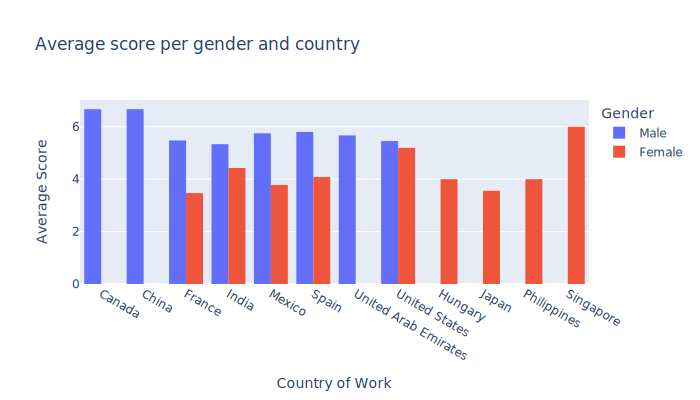

In [16]:
df_country_score_gender = df_master.groupby(['Country of Work', 'Gender'], as_index=False)['Score'].mean()
fig_sex_bar = px.histogram(df_country_score_gender, x='Country of Work', y='Score', 
                           color='Gender', barmode='group', height=400, title='Average score per gender and country')
fig_sex_bar.update_layout(yaxis_title='Average Score')
fig_sex_bar.show('svg') # not interactive display just to render on Github
# fig_sex_bar.show() #interactive display

#### Observations
Canada and China have a higher average score and all their workers are men. In contrast, the countries with the lowest average score, that is, Hungary, Japan and the Philippines, have only female employees. However, this observation is not significant since the score of only one employee in each of these countries is shown for the most part.

Among the countries with larger data samples we observe that there is a tendency for the average score of __men__ to be higher than the __women__'s one (including countries with the most and the less score) .

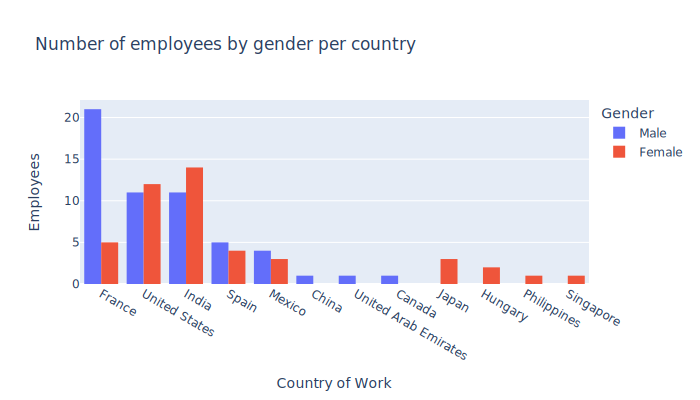

In [17]:
df_country_num_gender = df_master.value_counts(['Country of Work', 'Gender']).reset_index(name='Count')
fig_sex_bar2 = px.histogram(df_country_num_gender, x='Country of Work', y='Count', 
                           color='Gender', barmode='group', height=400, title='Number of employees by gender per country')
fig_sex_bar2.update_layout(yaxis_title='Employees')
fig_sex_bar2.show('svg') # not interactive display just to render on Github
# fig_sex_bar2.show() #interactive display

#### Observations
As we can see in __France__ 21 over 26 employees are men, this significant amount of men explains why the average score among them is higher than the women's one, as we have seen in the previous chart. From the other hand, in __USA__ and __India__ the number of male employees is less than women so we can conclude that in these countries the average score is in fact higher in men.

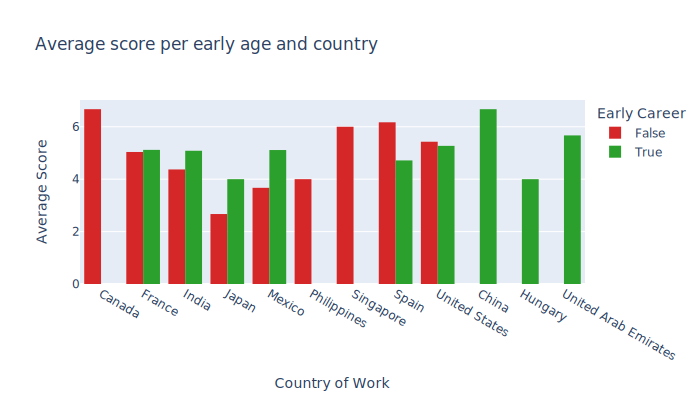

In [18]:
df_country_score_gender = df_master.groupby(['Country of Work', 'Early Career'], as_index=False)['Score'].mean()
fig_sex_bar = px.histogram(df_country_score_gender, x='Country of Work', y='Score', 
                           color='Early Career', barmode='group', height=400, 
                           title='Average score per early age and country',
                          color_discrete_sequence=['#D62728', '#2CA02C'])
fig_sex_bar.update_layout(yaxis_title='Average Score')
fig_sex_bar.show('svg') # not interactive display just to render on Github
# fig_sex_bar.show() #interactive display

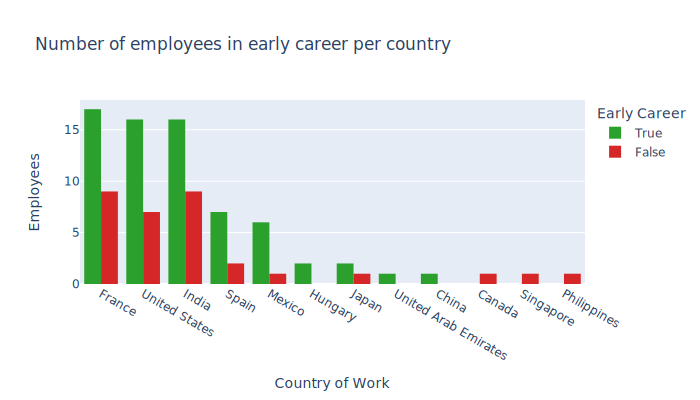

In [19]:
df_country_age = df_master.value_counts(['Country of Work', 'Early Career']).reset_index(name='Count')
fig_bar_age = px.histogram(df_country_age, x='Country of Work', y='Count', 
                           color='Early Career', barmode='group', height=400, 
                           title='Number of employees in early career per country', 
                           color_discrete_sequence=['#2CA02C', '#D62728'])
fig_bar_age.update_layout(yaxis_title='Employees')
fig_bar_age.show('svg') # not interactive display just to render on Github
# fig_bar_age.show() #interactive display

#### Observations
The average score among employees that are in their early career and employees that are not is very similar. And the amount of employees that are not in early career is nearly the half while the score between them and the employees is very similar, which means that the average score between early career employees is lower, as expected.

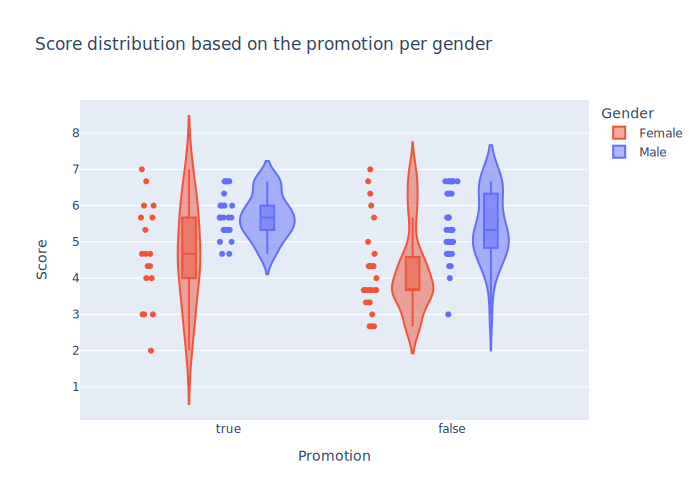

In [20]:
fig_violin = px.violin(df_master, y="Score", x="Promotion", box=True, color="Gender", points="all", 
                       hover_data=df_master.columns, title="Score distribution based on the promotion per gender", 
                       color_discrete_sequence=['#EF553B', '#636EFA'])
fig_violin.show('svg') # not interactive display just to render on Github
# fig_violin.show() #interactive display

#### Observations
According to the probability density of the violin plot, women usually promote when their score has a value between 4 and around 6, with a median of 4.67. While men commonly promote with an average score of 5.67. Due to the distribution of the people who promote, we can also observe that the score values of promoted men have a more concentrated density with a restricted score range between 4 and 7, while promoted women have a more evenly distributed density of score and of a greater range, encompassing higher and lower values than in the case of men. Thus, we can conclude that men tend to be promoted only when they reach scores between 5 to 6 while women not necessarily use to have a high score to be promoted. However, their average range score to get a promotion is with values between 4 and 6 which is similar to the men's one.

On the contrary, among the non-promoted people we find that the density of score among men is more uniform and of a wider range, having an average score of 5.33. And for unpromoted women, we observe that their score is concentrated between 3.5 and 4.5 with a median of 3.67.

To the right of each distribution we can see the points that represent our data values. These indicate that especially in the case of men there is no directly proportional relationship between score and promotion. While for women this trend is observed, but there are cases for which greater score is not associated with a promotion either.

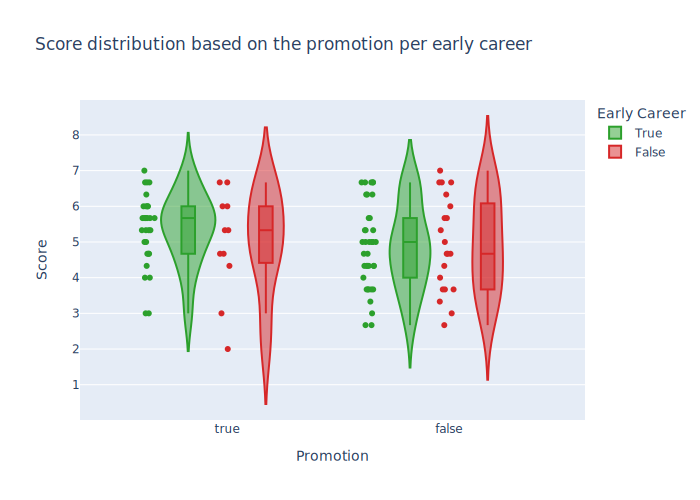

In [21]:
fig_violin = px.violin(df_master, y="Score", x="Promotion", box=True, color="Early Career", points="all", 
                       hover_data=df_master.columns, title="Score distribution based on the promotion per early career", 
                       color_discrete_sequence=['#2CA02C', '#D62728'])
fig_violin.show('svg') # not interactive display just to render on Github
# fig_violin.show() #interactive display

#### Observations
For early career attribute we can see easily that the density of the distributions of people in early carrer and people not in early career is very similar. In fact, for promoted employees in early career the median is 5.67 while in not early career is 5.33. There is a similar behaviour among not promoted employees when the respective medians are 5 and 4.67.

Although the number of early-career employees who are promoted is higher, there is barely a significant difference. And this behavious could be explained by the bigger amount of early-career employees since as it has been checked before the score density among early and not early career employees is almost the same.

And as we have seen for male employees, early-career employees does not have a directly proportional relationship between score and promotion. There are a few cases of not early-career employees with high scores that are not promoted either.